# 훈련세트와 테스트 세트
## 지도 학습과 비지도 학습
지도 학습
- 지도 학습에서는 데이터와 정답을 입력과 타깃이라고 한다.
- 합쳐서 훈련 데이터 라고 한다.

지도 학습은 정답(타깃)이 있으니, 알고리즘이 정답을 맞히는 것을 학습한다.

## 훈련 세트와 테스트 세트
지도 학습에서 훈련에 사용되는 데이터를 훈련세트, 평가에 사용하는 데이터를 테스트 세트라고 한다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\fdsaf\AppData\Local\Temp\ipykernel_21852\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [80]:
# 데이터 로드
fish_df = pd.read_csv('./fish_data.csv', index_col=0)
fish_df = fish_df.sample(frac=1, random_state=1).reset_index()

# 훈련 데이터 설정, 35개
train_input = fish_df[['length', 'weight']].iloc[:35]
# 타겟 데이터는 series로 하는게 자연스럽다.
train_target = fish_df['type'].iloc[:35]

# 테스트 데이터 설정, 나머지
test_input = fish_df[['length', 'weight']].iloc[35:]
test_target = fish_df['type'].iloc[35:]

display(train_input, test_input)

,length,weight
0,36.0,714.0
1,41.0,950.0
2,11.2,9.8
3,15.0,19.9
4,26.5,340.0
5,29.0,363.0
6,11.8,9.9
7,37.0,1000.0
8,12.4,13.4
9,38.5,920.0


,length,weight
35,29.7,500.0
36,30.0,390.0
37,13.0,12.2
38,26.3,290.0
39,33.0,700.0
40,25.4,242.0
41,32.0,600.0
42,29.7,450.0
43,31.0,500.0
44,30.7,500.0


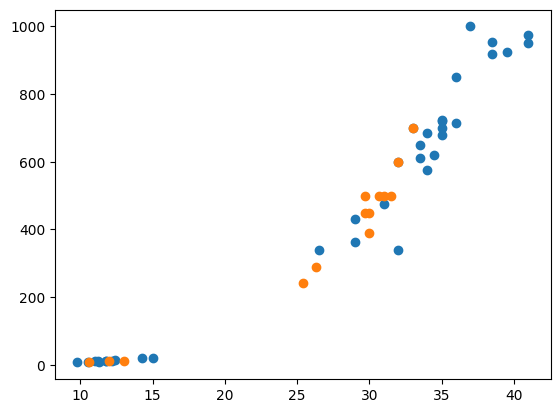

In [94]:
# 셔플 확인
plt.scatter(x=train_input.iloc[:,0], y=train_input.iloc[:,1])
plt.scatter(x=test_input.iloc[:,0], y=test_input.iloc[:,1])


In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()


length     29.0
weight    363.0
Name: 3, dtype: float64

In [76]:
# 모델 훈련
kn.fit(train_input, train_target)
kn.score(train_input, train_target)

1.0

In [95]:
# 모델 테스트
kn.score(test_input, test_target)

1.0

In [96]:
kn.predict(test_input)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [98]:
np.array(test_target)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)